In [150]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn import tree
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

plt.style.use('seaborn')


path = "training_data.csv"

data = pd.read_csv(path)
data = data.sample(frac=1)

"""categorical = ["Well Name", "Formation"]
for cats in categorical:
    try:
        dummed = pd.get_dummies(data[cats], prefix = cats)
        data = data.drop(cats, axis=1)
        data = data.join(dummed)
    except KeyError:
        pass"""

target = 'Facies'
features = [feature for feature in list(data.head(0)) if feature not in ("Well Name", "Formation", "Facies")]

X = data[features]

scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)


y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

train_sizes = list(range(295,2065,295))




def tv_scores_mean(estimator, X, y, train_sizes, scoring='accuracy', shuffle=True, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X=X, y=y, 
                                                                  train_sizes=train_sizes, scoring=scoring, 
                                                                  shuffle=shuffle, cv=cv)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    return train_sizes, train_scores_mean, validation_scores_mean

def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)
    
def gridsearch_helper(grid, estimator, X, y):
    gridsearch = model_selection.GridSearchCV(estimator = estimator, param_grid=grid)
    gridsearch.fit(X,y)
    return (gridsearch.best_estimator_, gridsearch.best_score_, gridsearch.best_params_)

def plot_complexity_curve(hyperparameter_values, time_complexity, train_scores_mean, validation_scores_mean):
    """
    https://matplotlib.org/examples/api/two_scales.html
    """
    fig, ax1 = plt.subplots()
    ax1.set_ylim([0,1.1])
    ax2 = ax1.twinx()
    ax1.plot(hyperparameter_values, train_scores_mean, label = 'Training F1')
    ax1.plot(hyperparameter_values, validation_scores_mean, label = 'Validation F1')
    ax2.plot(hyperparameter_values, time_complexity, label = 'Time Complexity')
    ax1.set_ylabel('Accuracy', fontsize = 14)
    ax1.set_xlabel('Training set size', fontsize = 14)
    ax1.set_title('Learning curves', fontsize = 18, y = 1.03)
    ax2.set_ylabel('Time Complexity', fontsize = 14)


print(X_train)

[[-0.35978836  0.40457082  1.4396801  ...  0.58458333  1.
  -0.08295397]
 [ 0.65873016 -1.00715432  0.30802498 ...  1.29041667  1.
  -0.68791098]
 [ 0.45502646  1.05292364 -0.7576516  ... -0.04291667  0.
  -0.59686394]
 ...
 [-0.89153439  1.08135749 -0.8795325  ... -0.87625     0.
   0.61305008]
 [ 0.46031746 -1.60334786  1.12056431 ...  1.54041667  1.
   0.81942337]
 [-0.5978836   0.10940916  0.00176016 ... -0.45958333  0.
   0.56651492]]


# ExtraTrees Classifier
ExtraTree stands for EXtremely RAndomized Trees. This algorithm is distinct from other 
In some cases, it can 

From the original paper,

https://orbi.uliege.be/bitstream/2268/9357/1/geurts-mlj-advance.pdf

Randomization increases bias and variance of individual trees (extremely undesirable), but may decrease their variance with respect to the learning sample

It is most sensitive to max_depth, relatively non-sensitive to n_estimators (surprisingly)

Does the performance of trees indicate anything about the performance we should expect here?

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=10, max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=True)
             precision    recall  f1-score   support

          1       1.00      0.72      0.84        54
          2       0.75      0.86      0.80       156
          3       0.79      0.75      0.77       130
          4       0.82      0.63      0.71        43
          5       0.76      0.49      0.59        39
          6       0.67      0.70      0.68        91
          7       0.65      1.00      0.79        13
          8       0.66      0.77      0.71        94
          9       0.96      0.81      0.88        27

avg / total       0.77      0.75      0.75       647

0.7542503863987635


C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


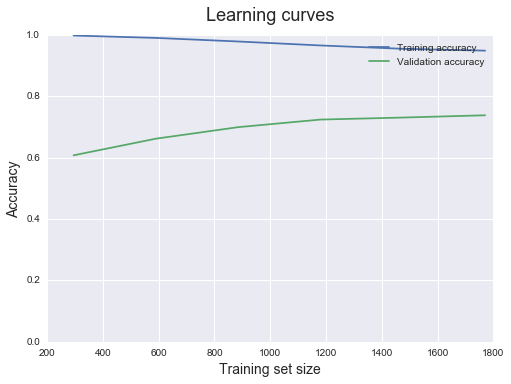

In [155]:
"""
This is the ExtraTreesClassifier

"""

etc_grid = {'n_estimators' : range(5,50,5), 'max_depth' : [5,10], 'max_features':["auto","log2",None], 'warm_start':[True, False]}
etc_est, etc_acc, etc_param = gridsearch_helper(etc_grid, ExtraTreesClassifier(random_state=1), X_train, y_train)
plot_learning_curve(*tv_scores_mean(etc_est,X_train,y_train,train_sizes))

print(etc_est)

etc_est.fit(X_train,y_train)
y_pred = etc_est.predict(X_test)

print(classification_report(y_test,y_pred))
print(etc_est.score(X_test, y_test))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[0.54177333 0.59400436 0.64796633 0.70773347 0.77156019 0.84389843
 0.91005431 0.94778559 0.98085674 0.99052554 0.99806628 0.99942018
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


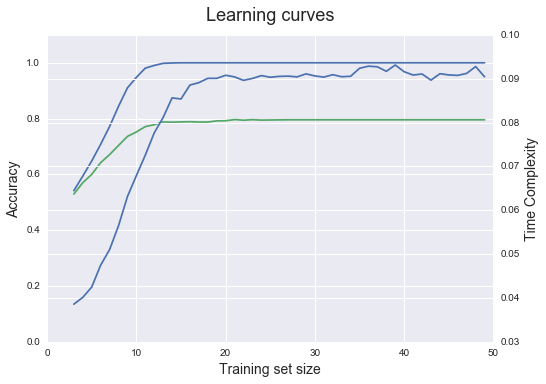

In [157]:
param_grid = {'max_depth' : range(3,50,1)}
gridsearch = model_selection.GridSearchCV(estimator = etc_est, param_grid = param_grid)
gridsearch.fit(X_train,y_train)
print(gridsearch.cv_results_['mean_train_score'])
plot_complexity_curve(param_grid['max_depth'], gridsearch.cv_results_['mean_fit_time'], gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
             precision    recall  f1-score   support

          1       0.78      0.63      0.70        60
          2       0.57      0.81      0.67       148
          3       0.74      0.51      0.61       136
          4       0.57      0.62      0.60        37
          5       0.51      0.40      0.45        45
          6       0.59      0.65      0.62        84
          7       0.36      0.22      0.28        18
          8       0.62      0.53      0.57        94
          9       0.72      0.92      0.81        25

avg / total       0.63      0.62      0.61       647

0.6197836166924265
[[ 38  21   1   0   0   0   0   0   0]
 [  9 120 

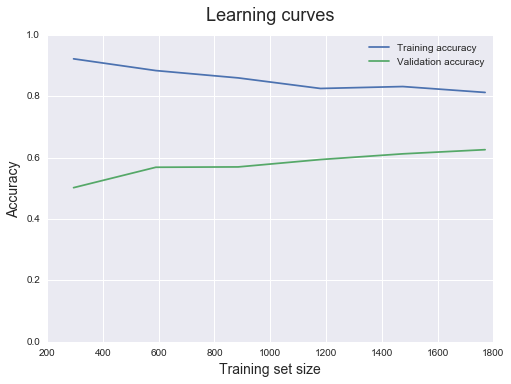

In [138]:
"""
This is the DecisionTreesClassifier

"""


tree_grid = {'max_depth' : range(3,10), 'splitter':["best","random"], 'max_features':["auto","log2",None]}
dtc_est, dtc_acc, dtc_param = gridsearch_helper(tree_grid, tree.DecisionTreeClassifier(random_state=1), X_train, y_train)
plot_learning_curve(*tv_scores_mean(dtc_est,X_train,y_train,train_sizes))

print(dtc_est)

dtc_est.fit(X_train,y_train)
y_pred = dtc_est.predict(X_test)

print(classification_report(y_test,y_pred))
print(dtc_est.score(X_test, y_test))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='distance')
             precision    recall  f1-score   support

          1       0.85      0.78      0.82        60
          2       0.75      0.89      0.81       148
          3       0.88      0.77      0.82       136
          4       0.73      0.81      0.77        37
          5       0.82      0.51      0.63        45
          6       0.67      0.79      0.72        84
          7       1.00      0.72      0.84        18
          8       0.72      0.62      0.66        94
          9       0.73      0.96      0.83        25

avg / total       0.78      0.77      0.77       647

0.7697063369397218
[[ 47  13   0   0   0   0   0   0   0]
 [  5 132  11   0   0   0   0   0   0]
 [  2  26 105   0   1   1   0   1   0]
 [  0   0   1  30   0   3   0   3   0]
 [  1   2   2   3  23   6   0   6   2]
 [  0   0   0   4   2  66   0  10  

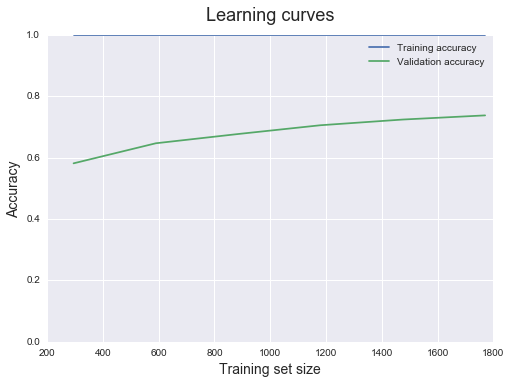

In [139]:
"""
This is kNearestNeighbors

"""


knn_grid = {'n_neighbors' : range(5,10), 'p':[1,2], 'weights':["uniform","distance"]}
knn_est, knn_acc, knn_param = gridsearch_helper(knn_grid, sklearn.neighbors.KNeighborsClassifier(), X_train, y_train)
print(knn_est)

plot_learning_curve(*tv_scores_mean(knn_est,X_train,y_train,train_sizes))

knn_est.fit(X_train,y_train)
y_pred = knn_est.predict(X_test)

print(classification_report(y_test,y_pred))
print(knn_est.score(X_test, y_test))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=True), 0.7172147001934236, {'max_features': 'log2', 'n_estimators': 9, 'warm_start': True})


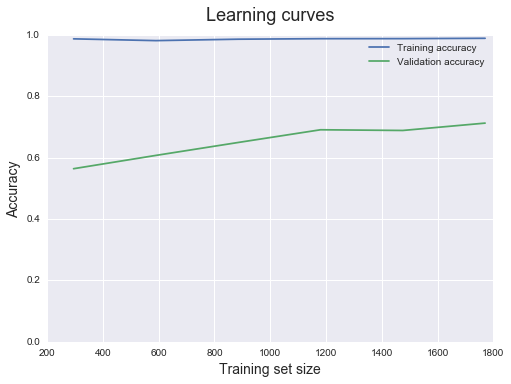

In [127]:
rfc_grid = {'n_estimators' : range(2,10), 'max_features':["auto","log2",None], 'warm_start':[True, False]}
rfc_results = gridsearch_helper(rfc_grid, RandomForestClassifier(random_state=1), X_train, y_train)
print(rfc_results)

rfc_est = rfc_results[0]

plot_learning_curve(*tv_scores_mean(rfc_est,X_train,y_train,train_sizes))



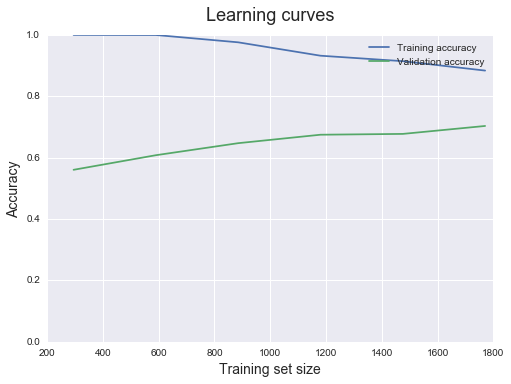

In [89]:
from sklearn.neural_network import MLPClassifier

nn_grid = {'hidden_layer_sizes': [(n,n) for n in range(10,100,10)] + [(n,) for n in range(50,200,50)]}
nn_results = gridsearch_helper(nn_grid, MLPClassifier(random_state=1,solver='lbfgs', max_iter = 500), X_train, y_train)
print(nn_results)

mlp_est = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(30,30), random_state=1)


plot_learning_curve(*tv_scores_mean(mlp_est,X_train,y_train,train_sizes))

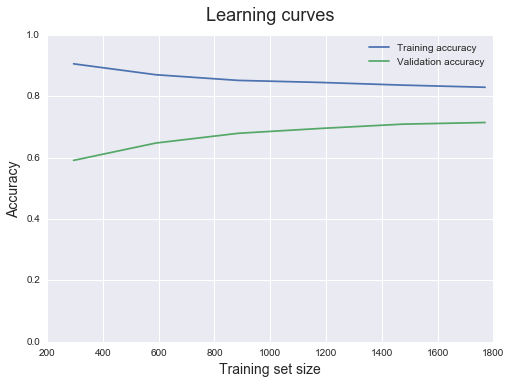

In [106]:
from sklearn import svm

svc_grid = {'C': range(1,20,2)}
svc_results = gridsearch_helper(svc_grid, svm.SVC(), X_train, y_train)
print(svc_results)

svm_est = svc_results[0]

plot_learning_curve(*tv_scores_mean(svm_est,X_train,y_train,train_sizes))

C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


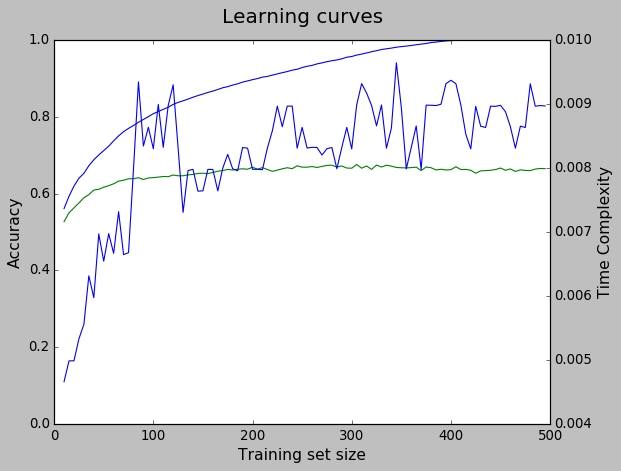

In [91]:
from sklearn import svm, model_selection


param_grid = {'max_leaf_nodes' : range(10,500,5)}

gridsearch = model_selection.GridSearchCV(estimator = tree.DecisionTreeClassifier(), param_grid = param_grid)

gridsearch.fit(X_train,y_train)

plt.style.use('classic')

def plot_complexity_curve(hyperparameter_values, time_complexity, train_scores_mean, validation_scores_mean):
    """
    https://matplotlib.org/examples/api/two_scales.html
    """
    fig, ax1 = plt.subplots()
    ax1.set_ylim([0,1])
    ax2 = ax1.twinx()
    ax1.plot(hyperparameter_values, train_scores_mean, label = 'Training F1')
    ax1.plot(hyperparameter_values, validation_scores_mean, label = 'Validation F1')
    ax2.plot(hyperparameter_values, time_complexity, label = 'Time Complexity')
    ax1.set_ylabel('Accuracy', fontsize = 14)
    ax1.set_xlabel('Training set size', fontsize = 14)
    ax1.set_title('Learning curves', fontsize = 18, y = 1.03)
    ax2.set_ylabel('Time Complexity', fontsize = 14)

plot_complexity_curve(param_grid['max_leaf_nodes'], gridsearch.cv_results_['mean_fit_time'], gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'])

In [92]:
from sklearn.metrics import classification_report

best_class = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=29, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=True)

best_class.fit(X_train,y_train)
y_pred = best_class.predict(X_test)

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.88      0.82      0.85        55
          2       0.71      0.83      0.76       134
          3       0.83      0.76      0.79       135
          4       0.68      0.78      0.73        36
          5       0.69      0.56      0.62        39
          6       0.71      0.73      0.72        85
          7       0.88      0.65      0.75        23
          8       0.76      0.75      0.76       108
          9       0.94      0.97      0.95        32

avg / total       0.77      0.77      0.77       647



In [95]:
best_class_2 = sklearn.neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=1,
           weights='distance')
best_class_2.fit(X_train,y_train)
y_pred = best_class_2.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.90      0.85      0.88        55
          2       0.83      0.83      0.83       134
          3       0.83      0.89      0.86       135
          4       0.68      0.69      0.68        36
          5       0.72      0.72      0.72        39
          6       0.73      0.76      0.75        85
          7       0.81      0.74      0.77        23
          8       0.83      0.75      0.79       108
          9       0.94      1.00      0.97        32

avg / total       0.81      0.81      0.81       647

